In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn import svm, metrics 
from sklearn.ensemble import RandomForestClassifier

In [10]:
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

In [11]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [13]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


RANDOM FOREST MODEL___________________________________________________________________________________________________________________________________________________________________________________________________________________ 

In [14]:
# define our training data.
y = train_data["Survived"]

# define the features we want to use.
features = ["Pclass", "Sex", "Age", "SibSp", "Parch"]
# Use pd.get_dummies to convert categorical columns to numerical.
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Create a copy of the data to work with to avoid changing the original data.
X = X.copy()
X_test = X_test.copy()

# Fill in missing values with the median value.
X.loc[:, "Age"] = X["Age"].fillna(X["Age"].median())
X_test.loc[:, "Age"] = X_test["Age"].fillna(X_test["Age"].median())

# Create a Random Forest model.
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

# Fit the model to the training data.
model.fit(X, y)

# Make predictions using the test data.
rfc_pred = model.predict(X_test)

# Create a DataFrame with the passengers ids and our prediction regarding whether they survived or not.
rf_output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Sex': test_data.Sex, 'Survived': rfc_pred})




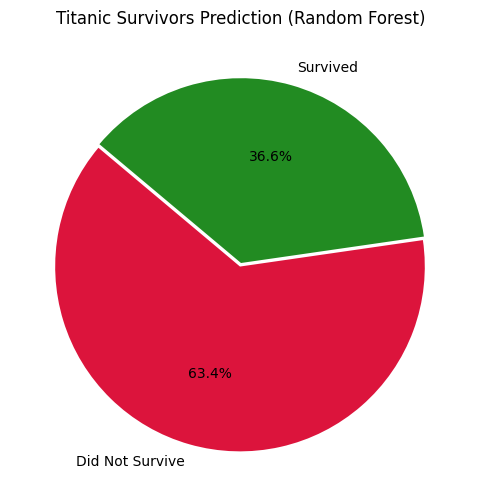

In [15]:
# Create a pie chart.
rf_sruvivors = rf_output["Survived"].value_counts()
explode = (0.02, 0)
# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(rf_sruvivors, labels=["Did Not Survive", "Survived"], explode=explode, autopct='%1.1f%%', colors=['crimson', 'ForestGreen'], startangle=140)
plt.title("Titanic Survivors Prediction (Random Forest)")
plt.show()


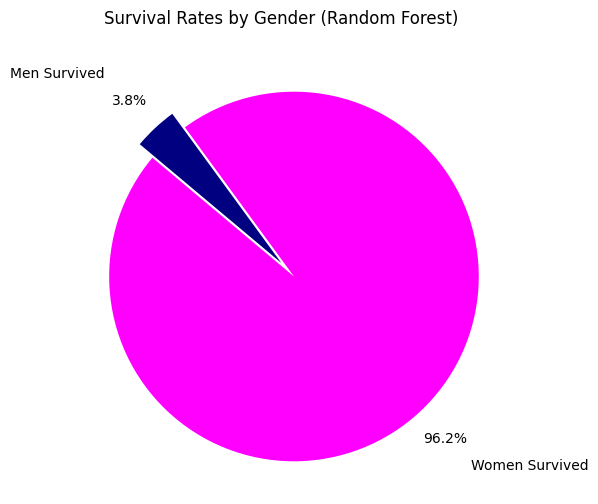

In [16]:
# Create a pie chart to show the survival rates by gender.
women = rf_output.loc[rf_output.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

men = rf_output.loc[rf_output.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

labels = ['Women Survived', 'Men Survived']
sizes = [rate_women, rate_men]
colors = ['fuchsia', 'navy']
explode = (0.1, 0)  # Slightly "explode" the first slice (optional)

# Create the pie chart
plt.figure(figsize=(6, 6))  # Set figure size
plt.pie(
    sizes, 
    labels=labels, 
    colors=colors, 
    autopct='%1.1f%%',  # Display percentages
    startangle=140,     # Rotate start angle for better appearance
    explode=explode,    # Highlight one of the slices
    pctdistance=1.2,    # Distance of percentage labels from center
    labeldistance=1.4   # Distance of text labels from center
)

plt.title("Survival Rates by Gender (Random Forest)")
plt.show()

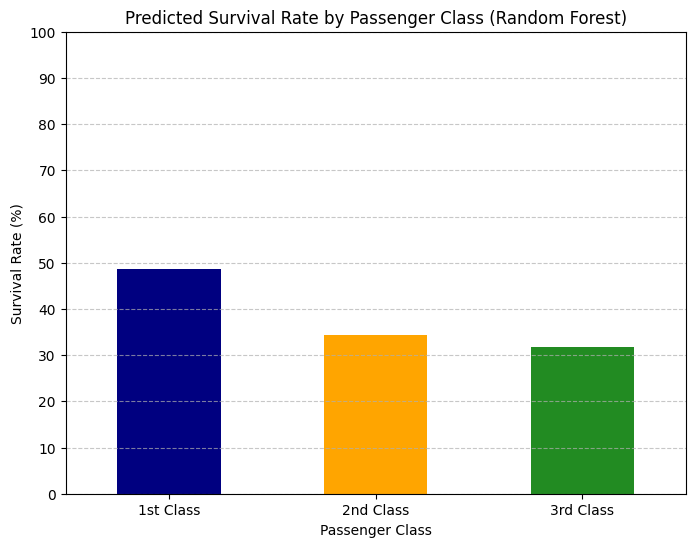

In [17]:
# Create a bar graph that shows the survival rates by passenger class.
rf_per_class = test_data["Pclass"].value_counts().sort_index()

# Count predicted survivors per class
rf_pclass_survivors = rf_output.groupby(test_data["Pclass"])["Survived"].sum()

# Compute survival percentage
rf_pclass_survival_rate = (rf_pclass_survivors / rf_per_class) * 100

# Plot bar chart of survival percentage
plt.figure(figsize=(8,6))
rf_pclass_survival_rate.plot(kind='bar', color=['navy', 'orange', 'forestgreen'])
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate (%)")
plt.title("Predicted Survival Rate by Passenger Class (Random Forest)")
plt.xticks(ticks=[0, 1, 2], labels=["1st Class", "2nd Class", "3rd Class"], rotation=0)
plt.ylim(0, 100)  # Set y-axis limit to 100% for clarity
plt.yticks(np.arange(0, 110, 10))  # Generates ticks at 0, 10, 20, ..., 100

# Add a grid (dashed lines for better readability)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

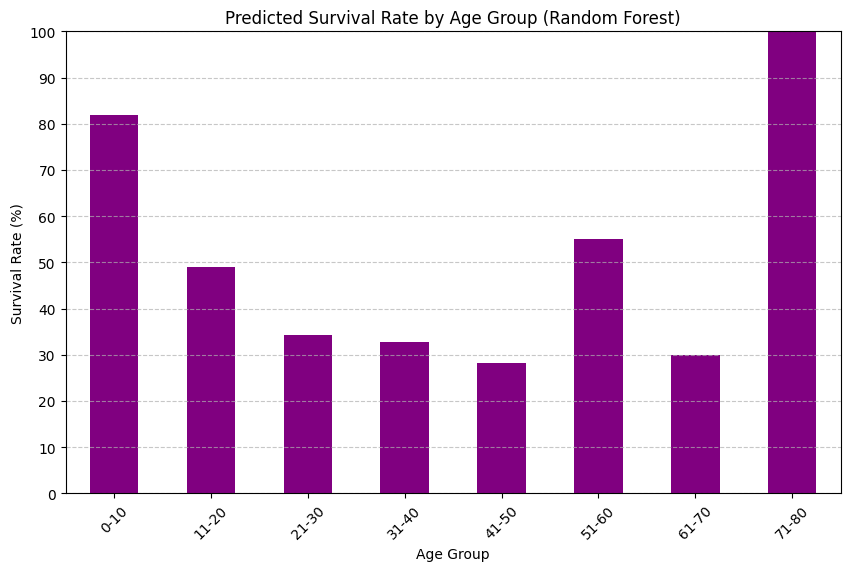

In [18]:
# Define age bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ["0-10", "11-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80"]

# Add "Age Group" column to predictions DataFrame
rf_output["Age"] = test_data["Age"]  # Add age to the predictions DataFrame
rf_output["Age Group"] = pd.cut(rf_output["Age"], bins=bins, labels=labels, include_lowest=True)

# Count total passengers per age group in the test dataset
total_per_age_group = rf_output["Age Group"].value_counts(sort=False)

# Count predicted survivors per age group
rf_age_survivors = rf_output.groupby("Age Group", observed=False)["Survived"].sum()

# Compute survival percentage
rf_age_survival_rate = (rf_age_survivors / total_per_age_group) * 100

# Plot bar chart
plt.figure(figsize=(10, 6))
rf_age_survival_rate.plot(kind='bar', color='purple')

# Customize labels and title
plt.xlabel("Age Group")
plt.ylabel("Survival Rate (%)")
plt.title("Predicted Survival Rate by Age Group (Random Forest)")
plt.xticks(rotation=45)

# Set y-axis limits and tick marks (0 to 100 in steps of 10)
plt.ylim(0, 100)
plt.yticks(np.arange(0, 110, 10))

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

LOGISTIC REGRESSION____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

In [19]:
# define our training data.
y = train_data["Survived"]

# define the features we want to use.
features = ["Pclass", "Sex", "Age", "SibSp", "Parch"]
# Use pd.get_dummies to convert categorical columns to numerical.
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Create a copy of the data to work with to avoid changing the original data.
X = X.copy()
X_test = X_test.copy()

# Fill in missing values with the median value.
X.loc[:, "Age"] = X["Age"].fillna(X["Age"].median())
X_test.loc[:, "Age"] = X_test["Age"].fillna(X_test["Age"].median())

# Create a Logistic Regression model.
log_reg = LogisticRegression()

# Fit the model to the training data.
log_reg.fit(X,y)

# Predict the test data.
log_predictions = log_reg.predict(X_test)

# Create a DataFrame with the passengers ids and our prediction regarding whether they survived or not.
log_output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Sex': test_data.Sex, 'Survived': log_predictions})



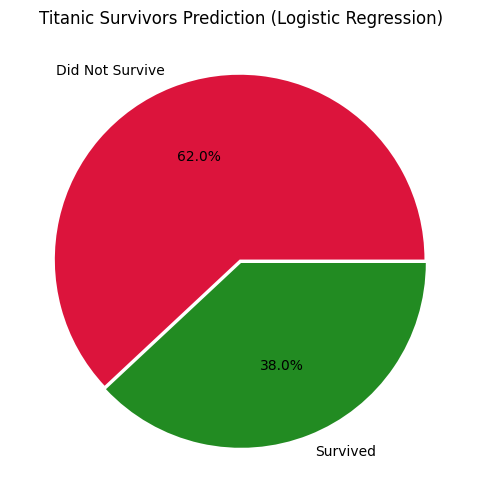

In [20]:
# This is a pie chart that shows the survival rates of the passengers.
log_sruvivors = log_output["Survived"].value_counts()

# Plot pie chart
explode = (0.02, 0)
plt.figure(figsize=(6,6))
plt.pie(log_sruvivors, labels=["Did Not Survive", "Survived"], explode= explode, autopct='%1.1f%%', colors=['crimson', 'ForestGreen'])
plt.title("Titanic Survivors Prediction (Logistic Regression)")
plt.show()

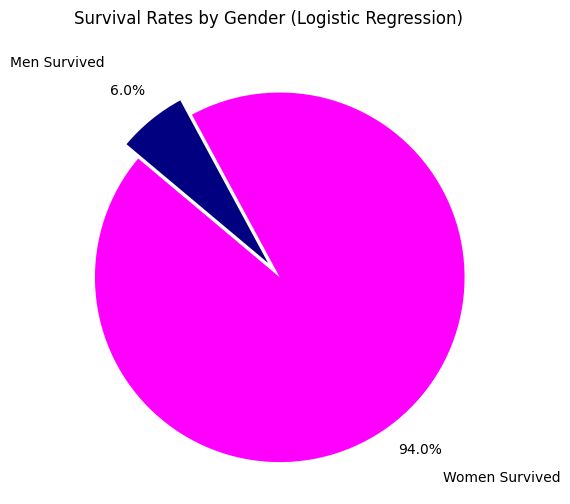

In [21]:
# This pie chart shows the survival rate by gender.
log_women = log_output.loc[log_output.Sex == 'female']["Survived"]
log_rate_women = sum(log_women)/len(log_women)

log_men = log_output.loc[log_output.Sex == 'male']["Survived"]
log_rate_men = sum(log_men)/len(log_men)

labels = ['Women Survived', 'Men Survived']
sizes = [log_rate_women, log_rate_men]
colors = ['fuchsia', 'navy']
explode = (0.1, 0)  # Slightly "explode" the first slice (optional)

# Create the pie chart
plt.figure(figsize=(6, 6))  # Set figure size
plt.pie(
    sizes, 
    labels=labels, 
    colors=colors, 
    autopct='%1.1f%%',  # Display percentages
    startangle=140,     # Rotate start angle for better appearance
    explode=explode,    # Highlight one of the slices
    pctdistance=1.2,    # Distance of percentage labels from center
    labeldistance=1.4   # Distance of text labels from center
)

plt.title("Survival Rates by Gender (Logistic Regression)")
plt.show()

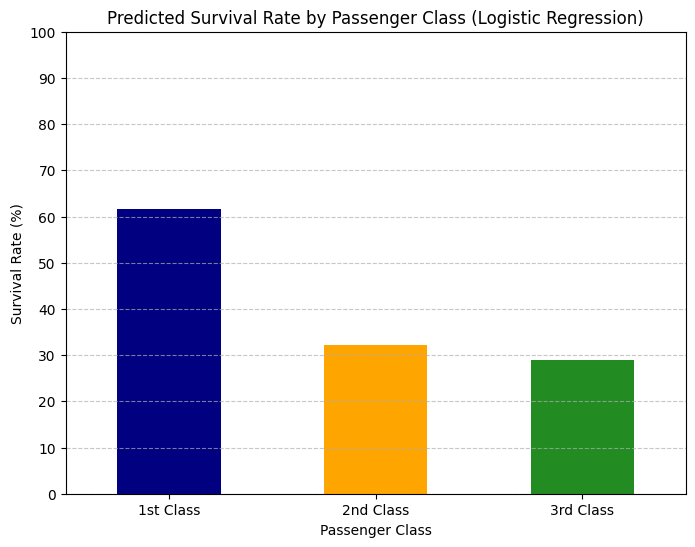

In [22]:
# this bar graph shows the survival rates by passenger class.
log_per_class = test_data["Pclass"].value_counts().sort_index()

# Count predicted survivors per class
log_pclass_survivors = log_output.groupby(test_data["Pclass"])["Survived"].sum()

# Compute survival percentage
log_pclass_survival_rate = (log_pclass_survivors / log_per_class) * 100

# Plot bar chart of survival percentage
plt.figure(figsize=(8,6))
log_pclass_survival_rate.plot(kind='bar', color=['navy', 'orange', 'forestgreen'])
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate (%)")
plt.title("Predicted Survival Rate by Passenger Class (Logistic Regression)")
plt.xticks(ticks=[0, 1, 2], labels=["1st Class", "2nd Class", "3rd Class"], rotation=0)
plt.ylim(0, 100)  # Set y-axis limit to 100% for clarity
plt.yticks(np.arange(0, 110, 10))  # Generates ticks at 0, 10, 20, ..., 100

# Add a grid (dashed lines for better readability)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

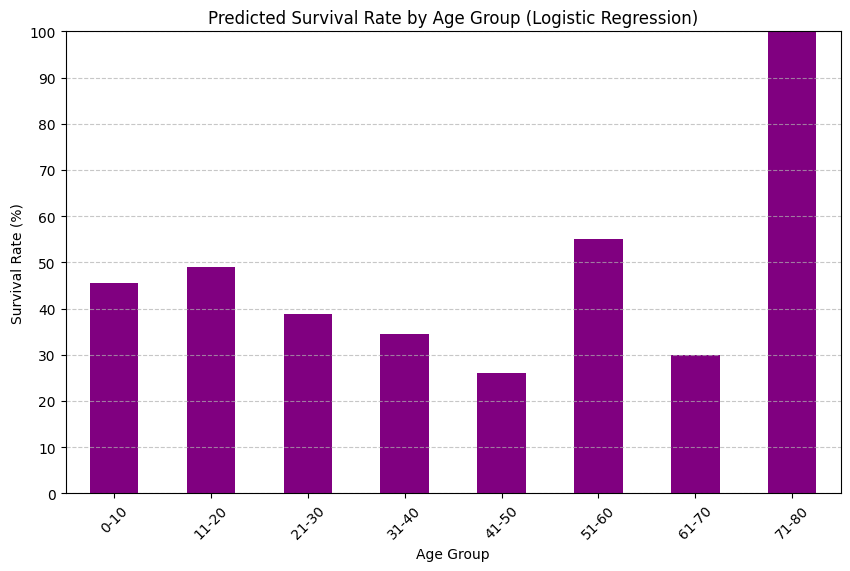

In [23]:
# This bar graph shows the survival rates by age group.
# Define age bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ["0-10", "11-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80"]

# Add "Age Group" column to predictions DataFrame
log_output["Age"] = test_data["Age"]  # Add age to the predictions DataFrame
log_output["Age Group"] = pd.cut(log_output["Age"], bins=bins, labels=labels, include_lowest=True)

# Count total passengers per age group in the test dataset
log_total_per_age_group = log_output["Age Group"].value_counts(sort=False)

# Count predicted survivors per age group
log_age_survivors = log_output.groupby("Age Group", observed=False)["Survived"].sum()

# Compute survival percentage
log_age_survival_rate = (log_age_survivors / log_total_per_age_group) * 100

# Plot bar chart
plt.figure(figsize=(10, 6))
log_age_survival_rate.plot(kind='bar', color='purple')

# Customize labels and title
plt.xlabel("Age Group")
plt.ylabel("Survival Rate (%)")
plt.title("Predicted Survival Rate by Age Group (Logistic Regression)")
plt.xticks(rotation=45)

# Set y-axis limits and tick marks (0 to 100 in steps of 10)
plt.ylim(0, 100)
plt.yticks(np.arange(0, 110, 10))

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [24]:
same_predictions = (rfc_pred == log_predictions).all()
print("Are all predictions identical?", same_predictions)

Are all predictions identical? False


DECISION TREE________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

In [25]:
# define our training data.
y = train_data["Survived"]

# define the features we want to use.
features = ["Pclass", "Sex", "Age", "SibSp", "Parch"]
# Use pd.get_dummies to convert categorical columns to numerical.
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Create a copy of the data to work with to avoid changing the original data.
X = X.copy()
X_test = X_test.copy()

# Fill in missing values with the median value.
X.loc[:, "Age"] = X["Age"].fillna(X["Age"].median())
X_test.loc[:, "Age"] = X_test["Age"].fillna(X_test["Age"].median())
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X, y)
dtc_pred = dtc_model.predict(X_test)
dtc_output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Sex': test_data.Sex, 'Survived': dtc_pred})

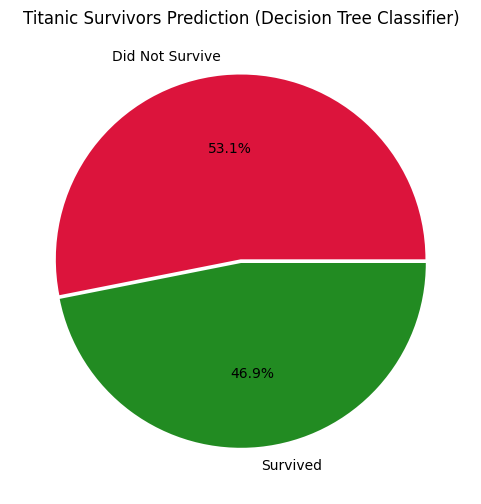

In [26]:
# Pie chart that shows the survival rates of the passengers.
dtc_sruvivors = dtc_output["Survived"].value_counts()

# Plot pie chart
explode = (0.02, 0)
plt.figure(figsize=(6,6))
plt.pie(dtc_sruvivors, labels=["Did Not Survive", "Survived"], explode= explode, autopct='%1.1f%%', colors=['crimson', 'ForestGreen'])
plt.title("Titanic Survivors Prediction (Decision Tree Classifier)")
plt.show()

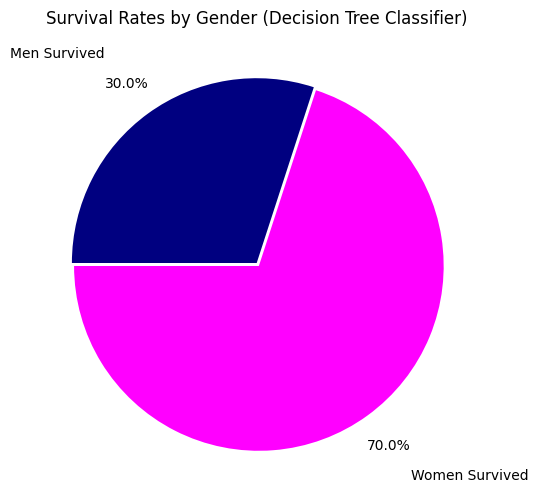

In [27]:
# Pie chart that shows the survival rate by gender.
dtc_women = dtc_output.loc[dtc_output.Sex == 'female']["Survived"]
dtc_rate_women = sum(dtc_women)/len(dtc_women)

dtc_log_men = dtc_output.loc[dtc_output.Sex == 'male']["Survived"]
dtc_rate_men = sum(dtc_log_men)/len(dtc_log_men)

labels = ['Women Survived', 'Men Survived']
sizes = [dtc_rate_women, dtc_rate_men]
colors = ['fuchsia', 'navy']
explode = (0.02, 0)  # Slightly "explode" the first slice (optional)

# Create the pie chart
plt.figure(figsize=(6, 6))  # Set figure size
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180, explode=explode, pctdistance=1.2, labeldistance=1.4)

plt.title("Survival Rates by Gender (Decision Tree Classifier)")
plt.show()

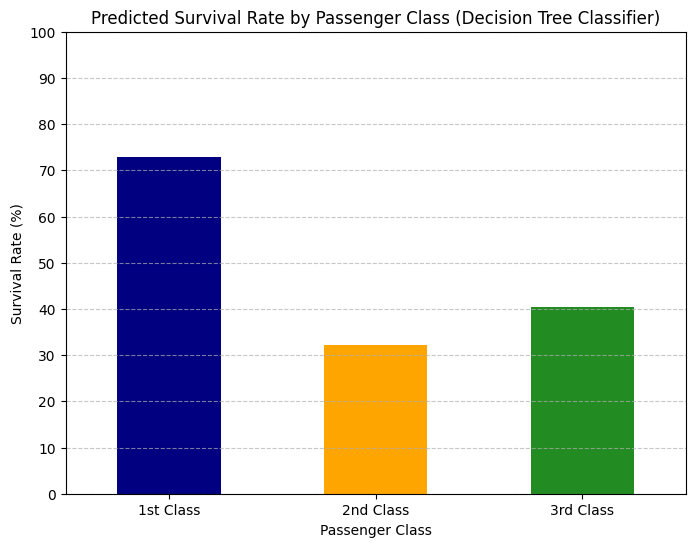

In [28]:
# Bar graph that shows the survival rate by passenger class.
dtc_per_class = test_data["Pclass"].value_counts().sort_index()

# Count predicted survivors per class
dtc_pclass_survivors =dtc_output.groupby(test_data["Pclass"])["Survived"].sum()

# Compute survival percentage
dtc_pclass_survival_rate = (dtc_pclass_survivors / dtc_per_class) * 100

# Plot bar chart of survival percentage
plt.figure(figsize=(8,6))
dtc_pclass_survival_rate.plot(kind='bar', color=['navy', 'orange', 'forestgreen'])
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate (%)")
plt.title("Predicted Survival Rate by Passenger Class (Decision Tree Classifier)")
plt.xticks(ticks=[0, 1, 2], labels=["1st Class", "2nd Class", "3rd Class"], rotation=0)
plt.ylim(0, 100)  # Set y-axis limit to 100% for clarity
plt.yticks(np.arange(0, 110, 10))  # Generates ticks at 0, 10, 20, ..., 100

# Add a grid (dashed lines for better readability)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

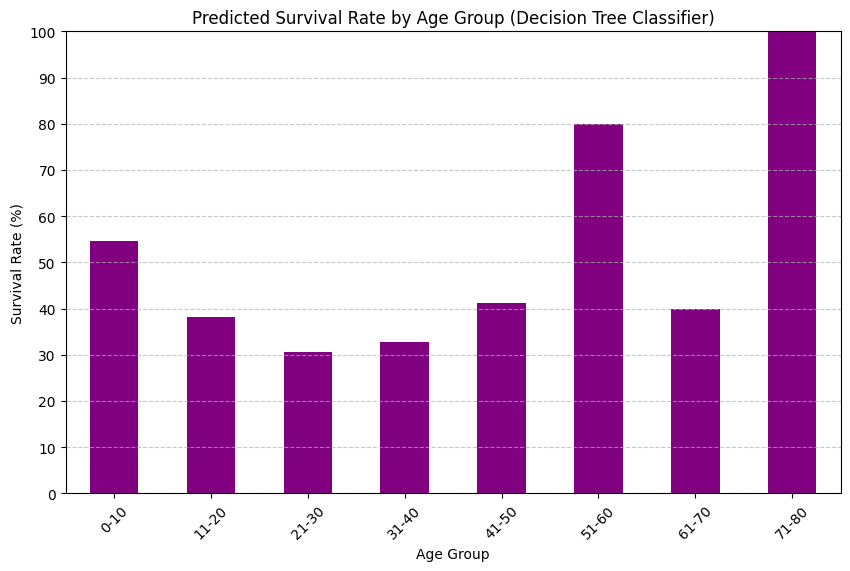

In [29]:
# Bar graph that shows the survival rate by age group.

# Define age bins
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ["0-10", "11-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80"]

# Add "Age Group" column to predictions DataFrame
dtc_output["Age"] = test_data["Age"]  # Add age to the predictions DataFrame
dtc_output["Age Group"] = pd.cut(dtc_output["Age"], bins=bins, labels=labels, include_lowest=True)

# Count total passengers per age group in the test dataset
dtc_total_per_age_group = dtc_output["Age Group"].value_counts(sort=False)

# Count predicted survivors per age group
dtc_age_survivors = dtc_output.groupby("Age Group", observed=False)["Survived"].sum()

# Compute survival percentage
dtc_age_survival_rate = (dtc_age_survivors / dtc_total_per_age_group) * 100

# Plot bar chart
plt.figure(figsize=(10, 6))
dtc_age_survival_rate.plot(kind='bar', color='purple')

# Customize labels and title
plt.xlabel("Age Group")
plt.ylabel("Survival Rate (%)")
plt.title("Predicted Survival Rate by Age Group (Decision Tree Classifier)")
plt.xticks(rotation=45)

# Set y-axis limits and tick marks (0 to 100 in steps of 10)
plt.ylim(0, 100)
plt.yticks(np.arange(0, 110, 10))

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [30]:
same_predictions = (dtc_pred == rfc_pred).all()
print("Are all predictions identical?", same_predictions)

Are all predictions identical? False
